In [4]:
# module
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [5]:
# utils
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    Refer to: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, fontsize=25)
    plt.yticks(tick_marks, fontsize=25)
    plt.xlabel('Predicted label',fontsize=25)
    plt.ylabel('True label', fontsize=25)
    plt.title(title, fontsize=30)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size="5%", pad=0.15)
    cbar = ax.figure.colorbar(im, ax=ax, cax=cax)
    cbar.ax.tick_params(labelsize=20)

    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
#            title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    fontsize=20,
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [48]:
#df = pd.read_csv('../../output/results/oof_030_0.9838.csv')
df = pd.read_csv('../../output/results/oof_010_0.9868.csv')
df.head(3)

,filename,Xmin_Ymin_Xmax_Ymax,class,filename_trim,fold,target,pred,conf_0,conf_1,conf_2,...,conf_5,conf_6,conf_7,conf_8,conf_9,conf_10,conf_11,conf_12,conf_13,conf_14
0,8cdf4bda.jpg,"[1442, 1525, 1722, 2000]",USB_Mini,NaN,0,1,1,0.002003,0.960449,0.000066,...,0.001075,0.000149,0.000460,0.002108,0.000073,0.000800,0.000596,0.000103,0.001654,0.000207
1,f27f4a62.jpg,"[1347, 1841, 1730, 2191]",USB_Mini,NaN,0,1,1,0.000715,0.985840,0.000108,...,0.000668,0.000128,0.001589,0.002621,0.000223,0.000069,0.000240,0.000047,0.000449,0.000222
2,beafd644.jpg,"[716, 1504, 1903, 2505]",USB_Mini,NaN,0,1,1,0.001447,0.981445,0.000149,...,0.001402,0.000550,0.001578,0.001396,0.001184,0.000861,0.000284,0.000033,0.000334,0.000196


In [49]:
# processing

label_dict = {
   0 : 'HDMI',
   1 : 'USB_Mini',
   2 : 'Dock',
   3 : 'Lightning',
   4 : 'USB_Micro_B',
   5 : 'Mini_DisplayPort',
   6 : 'RJ_45',
   7 : 'USB_Type_A',
   8 : 'USB_Type_C',
   9 : 'USB_Micro_B_3.1',
  10 : 'USB_Type_B',
  11 : 'Lightning_T',
  12 : 'USB_Micro_B_W',
  13 : 'VGA',
  14 : 'DisplayPort'
}
class_names = []
for key in label_dict.keys():
    class_names.append(label_dict[key])

cm = confusion_matrix(df['target'], df['pred'])
np.set_printoptions(precision=2)

Normalized confusion matrix


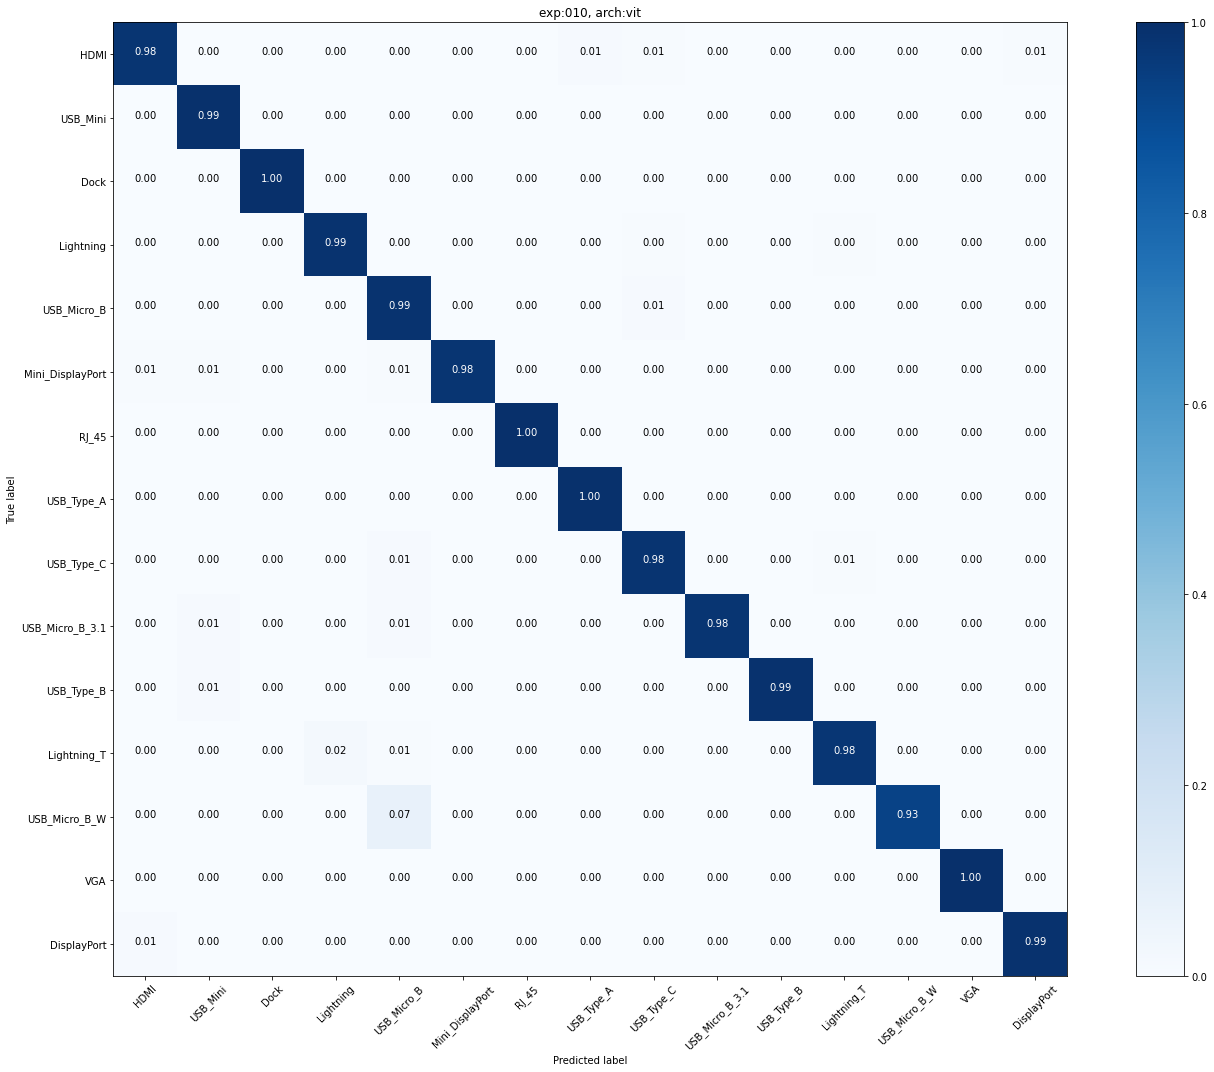

In [50]:
plt.figure(figsize=(20,15))

plot_confusion_matrix(
    cm, 
    classes=class_names,
    normalize=True,
    title='Confusion matrix')

plt.title('exp:010, arch:vit')
plt.savefig('../../EDA/confusion_matrix_010.jpg')